In [30]:
# Importing Models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


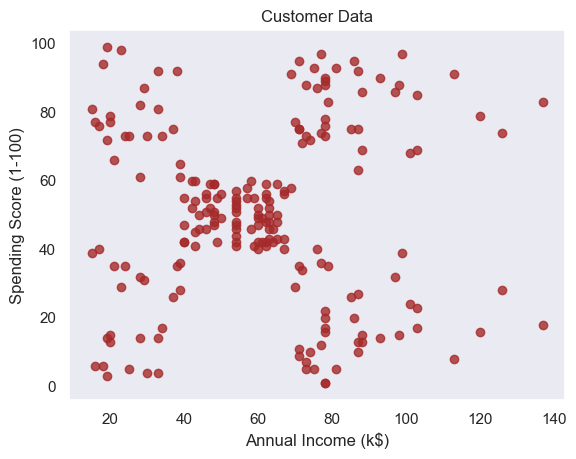

In [32]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],color='brown', alpha = 0.8)
plt.title('Customer Data')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

In [33]:
data_use = df[['Annual Income (k$)','Spending Score (1-100)']]

In [34]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 25, init = 'k-means++', random_state=32)
    kmeans.fit(data_use)
    WCSS.append(kmeans.inertia_)

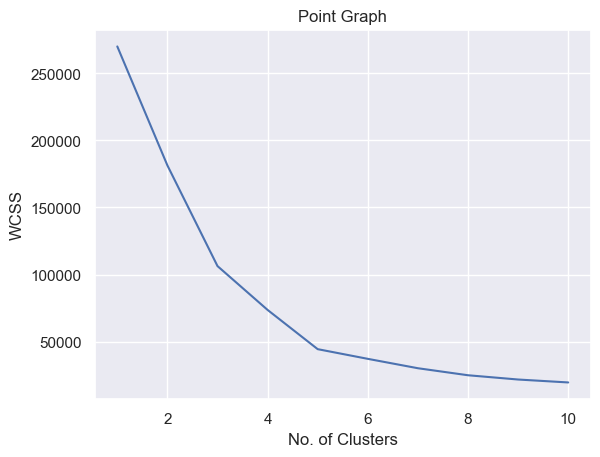

In [35]:
sns.set()
plt.plot(range(1,11), WCSS)
plt.title("Point Graph")
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5, n_init=25, init='k-means++', random_state=32)
Y = kmeans.fit_predict(data_use)
print(Y)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [40]:
df['cluster'] = Y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluter,cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,0,0


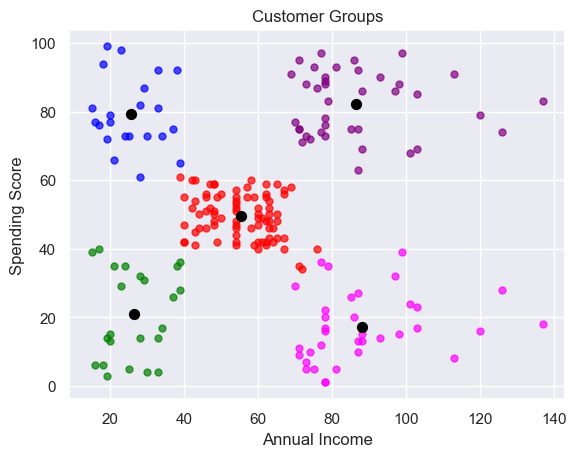

In [59]:
#Ploting the clusters
df1 = df[df['cluter'] == 0]
df2 = df[df['cluter'] == 1]
df3 = df[df['cluter'] == 2]
df4 = df[df['cluter'] == 3]
df5 = df[df['cluter'] == 4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], s=25, c='green', label='Cluster 1', alpha = 0.7)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], s=25, c='blue', label='Cluster 2', alpha = 0.7)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], s=25, c='red', label='Cluster 3', alpha = 0.7)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], s=25, c='purple', label='Cluster 4', alpha = 0.7)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], s=25, c='magenta', label='Cluster 5', alpha = 0.7)

#Ploting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()